<h1 style="font-weight:bold">Qual o Efeito da Legalização da Maconha na Taxa de Criminalidade ao Longo do Tempo?</h1>

<hr/>
<h2>Parte 2 - Análise Exploratória com Geolocalização e Modelagem Estatística</h2>
<hr/>

<h2>1) INTRODUÇÃO</2>

Para começar a parte 2 precisaremos dos 4 datasets gerados na primeira parte deste projeto:
* df_crimes.csv
* df_escolas.csv
* df_lojas.csv
* df_prisoes.csv

<h3>1.1) O que faremos na Parte 2:</h3>

* Análise exploratória dos dados.
* Construção de gráficos com Geolocalização, mostrando a localidade exata de ocorrência de cada evento.
* Transformação e segmentação dos dados por período de tempo.
* Cálculo de distância entre os eventos com base na geolocalização usando o pacote geopy.
* Resumo estatístico das variáveis.
* Análise e interpretação das distribuição das variáveis.
* Teste de normalidade para verificar se as amostras de dados foram extraídas de uma população que segue uma distribuição normal.
* Análise e interpretação do valor-p.
* Conclusões da análise exploratória.

<h3>1.2) Carregando os Pacotes Usados Neste Jupyter Notebook</h3>

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Imports para manipulação e visualização de dados
import scipy
import pandas as pd
from scipy import stats

#Imports para realizar os gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

# Imports para formatação dos gráficos
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 15,7
plt.style.use('fivethirtyeight')
%matplotlib inline

<hr/>
<h2>2) ANÁLISE EXPLORATÓRIA</h2>

Na Parte 1 do projeto trabalhamos na extração dos dados. Fizemos uma série de limpezas e transformações e deixamos os dados organizados para a etapa seguinte, na qual trabalharemos agora: análise exploratória e modelagem estatística. Nosso objetivo é compreender os dados, identificar e corrigir eventuais problemas que eles possam apresentar.

<h3>2.1) Número de Prisões Associadas à Maconha </h3>

Nossa primeira tarefa será analisar as prisões associadas à maconha, o objetivo principal do nosso estudo.

In [53]:
# Carregando os dados sobre prisões
df_prisoes = pd.read_csv('dados/df_prisoes.csv')
# Shape
df_prisoes.shape

(20673, 21)

In [54]:
df_prisoes.head()

,Unnamed: 0,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,...,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location,latitude,longitude,marijuana_related
0,340,5568617,2019-03-09,2015.0,6,Hollywood,646,29,M,O,...,Narcotic Drug Laws,F,11359HS,possession marijuana for sale,CHEROKEE,HOLLYWOOD,"['34.1016', '-118.335']",34.1016,-118.3350,possession marijuana for sale
1,342,5568629,2019-03-09,2015.0,6,Hollywood,646,25,M,B,...,Narcotic Drug Laws,F,11359HS,possession marijuana for sale,CHEROKEE,HOLLYWOOD,"['34.1016', '-118.335']",34.1016,-118.3350,possession marijuana for sale
2,983,5607178,2019-04-21,2115.0,7,Wilshire,702,42,M,B,...,Narcotic Drug Laws,F,11359(D)HS,poss/sale marij ovr 21 employ per 20/belw,MELROSE AV,FAIRFAX AV,"['34.0838', '-118.3614']",34.0838,-118.3614,poss/sale marij ovr 21 employ per 20/belw
3,1249,200608837,2020-03-17,2200.0,6,Hollywood,646,21,F,B,...,Narcotic Drug Laws,I,11362.3A1HS,smoke/ingest marijuana in public place,HOLLYWOOD,VINE,"['34.1016', '-118.3267']",34.1016,-118.3267,smoke/ingest marijuana in public place
4,1255,200608903,2020-03-19,2320.0,6,Hollywood,645,25,M,W,...,Narcotic Drug Laws,I,11362.3A1HS,smoke/ingest marijuana in public place,HOLLYWOOD,HIGHLAND,"['34.1016', '-118.3387']",34.1016,-118.3387,smoke/ingest marijuana in public place


In [55]:
# Resumo estatístico
df_prisoes.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,20673.0,5.421069e+05,3.585493e+05,340.0000,1.968940e+05,5.307320e+05,8.068310e+05,1.349967e+06
Report ID,20673.0,5.327595e+07,5.941124e+07,2586.0000,3.119415e+06,4.815994e+06,1.103068e+08,2.019007e+08
Time,20670.0,1.523880e+03,5.301552e+02,1.0000,1.245000e+03,1.615000e+03,1.905000e+03,2.358000e+03
Area ID,20673.0,1.098094e+01,6.080943e+00,1.0000,6.000000e+00,1.200000e+01,1.600000e+01,2.100000e+01
Reporting District,20673.0,1.146309e+03,6.065064e+02,100.0000,6.450000e+02,1.239000e+03,1.656000e+03,2.197000e+03
Age,20673.0,2.903749e+01,1.124652e+01,11.0000,2.000000e+01,2.600000e+01,3.500000e+01,7.900000e+01
Charge Group Code,20673.0,1.600000e+01,0.000000e+00,16.0000,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01
latitude,20673.0,3.405314e+01,7.200008e-01,0.0000,3.399330e+01,3.404820e+01,3.416760e+01,3.454770e+01
longitude,20673.0,-1.183042e+02,2.471156e+00,-118.6647,-1.184345e+02,-1.183306e+02,-1.182762e+02,0.000000e+00


Vejamos qual é o range de data das prisões.

In [56]:
print('As prisões ocorreram entre {} e {}'.format(df_prisoes['Arrest Date'].min(), df_prisoes['Arrest Date'].max()))

As prisões ocorreram entre 2010-01-01 e 2020-05-08


Não precisamos analisar as prisões em todas as datas. Vamos considerar somente as prisões entre 2014 e 2019, pois esse período compreende o antes e depois da data de legalização da maconha. A maconha foi legalizada em 2016 e liberação entrou em vigor em 2017. Assim teremos dados de 3 anos antes da liberação e 3 anos depois. Isso deve ser suficiente para a análise.

In [57]:
# Filtra o dataframe mantendo apenas os registros entre 2014 e 2019.
df_prisoes = df_prisoes[(df_prisoes['Arrest Date'] >= '2014-01-01') & (df_prisoes['Arrest Date'] <= '2019-12-31')]

# Shape
df_prisoes.shape

(6226, 21)

Agora vamos salvar o resultado em um arquivo csv.

In [58]:
# Salva o arquivo em disco (agora sem o índice)
df_prisoes.to_csv('dados/df_prisoes_parte2.csv', index = False)

Criaremos um gráfico de prisões considerando Geolocalização, ou seja, dados de latitude e longitude. Isso é mais fácil do que parece, desde que os dados estejam disponíveis.

In [59]:
df_prisoes.head()

,Unnamed: 0,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,...,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location,latitude,longitude,marijuana_related
0,340,5568617,2019-03-09,2015.0,6,Hollywood,646,29,M,O,...,Narcotic Drug Laws,F,11359HS,possession marijuana for sale,CHEROKEE,HOLLYWOOD,"['34.1016', '-118.335']",34.1016,-118.3350,possession marijuana for sale
1,342,5568629,2019-03-09,2015.0,6,Hollywood,646,25,M,B,...,Narcotic Drug Laws,F,11359HS,possession marijuana for sale,CHEROKEE,HOLLYWOOD,"['34.1016', '-118.335']",34.1016,-118.3350,possession marijuana for sale
2,983,5607178,2019-04-21,2115.0,7,Wilshire,702,42,M,B,...,Narcotic Drug Laws,F,11359(D)HS,poss/sale marij ovr 21 employ per 20/belw,MELROSE AV,FAIRFAX AV,"['34.0838', '-118.3614']",34.0838,-118.3614,poss/sale marij ovr 21 employ per 20/belw
6,2410,5616516,2019-05-01,1045.0,14,Pacific,1494,26,M,B,...,Narcotic Drug Laws,F,11360A3DHS,sale/trans >28.5g marijuana or >4g,500 WORLD WY,NaN,"['33.9428', '-118.4054']",33.9428,-118.4054,sale/trans >28.5g marijuana or >4g
8,2913,5616188,2019-05-01,5.0,15,N Hollywood,1543,27,M,B,...,Narcotic Drug Laws,F,11360A3DHS,sale/trans >28.5g marijuana or >4g,LAUREL CANYON BL,WEDDINGTON,"['34.1667', '-118.3965']",34.1667,-118.3965,sale/trans >28.5g marijuana or >4g


In [60]:
df_prisoes['Arrest Date'] = pd.to_datetime(df_prisoes['Arrest Date'])
df_prisoes['Year'] = df_prisoes['Arrest Date'].dt.year.astype(str)

In [61]:
fig = px.scatter(df_prisoes, x='latitude', y='longitude', color='Year')
fig.update_layout(
    title_text="<span>Total de prisões por ano</span>",
    autosize=False,
    width=1300,
    height=700,
)

fig.show()

In [62]:
df_prisoes.groupby('Year')['Year'].count()

Year
2014    1705
2015    1535
2016    1386
2017     528
2018     564
2019     508
Name: Year, dtype: int64

Os números (e os gráficos) mostram que o total de prisões diminuiu de 2014 a 2019. Não podemos afirmar categoricamente que foi devido à legalização da maconha, mas considerando que este foi o grande evento ocorrido no período (aprovado em 2016 e em vigor a partir de 01/01/2017), já podemos perceber uma tendência, afinal, o uso recreativo da maconha deixou de ser ocorrência de polícia.

Vejamos o que aconteceu nas áreas próximas aos pontos de venda legalizada de maconha.

<h3>2.2) Prisões Associadas à Maconha e Que Ocorreram Próximo a Pontos de Venda Legalizada de Maconha</3>

In [63]:
# Carrega o dataset
df_lojas = pd.read_csv('dados/df_lojas.csv')

# Shape
df_lojas.shape

(385, 10)

In [64]:
# Dados
df_lojas.head(3)

,Unnamed: 0,name,is_closed,url,rating,price,review_count,latitude,longitude,location
0,0,California Caregivers Alliance,False,https://www.yelp.com/biz/california-caregivers...,4.5,$$,364,34.08236,-118.271930,"(34.08236, -118.27193)"
1,1,Herbarium,False,https://www.yelp.com/biz/herbarium-los-angeles...,4.5,$$,417,34.08854,-118.344699,"(34.08854, -118.344699)"
2,2,MedMen- Los Angeles - DTLA,False,https://www.yelp.com/biz/medmen-los-angeles-dt...,4.0,$$,451,34.04460,-118.254440,"(34.0446, -118.25444)"


Uma das colunas indica se o ponto de venda está fechado ou não (is_closed). Pontos de venda fechados não trazem informação útil. Vamos checar.

In [65]:
# Verificando se há pontos de venda com status "fechado"
df_lojas['is_closed'].value_counts()

False    385
Name: is_closed, dtype: int64

Não há nenhum ponto de venda com status de fechado, portanto não teremos que nos preocupar com esse fator.

A variável **is_closed** já não fornece nenhuma informação valiosa e a variável **location** é redundante devido às variáveis **latitude** e **longitude**. Além disso, a coluna **url** não é necessária para fins de análise exploratória de dados, portanto as três variáveis serão descartadas. As variáveis rating, price e review_count também não são úteis para esta análise.

De fato, precisamos somente do nome, latitude e longitude.

In [66]:
# Filtrando o dataframe e mantendo somente as colunas necessárias para análise
df_lojas = df_lojas[['name', 'latitude', 'longitude']]

# Dados
df_lojas.head(5)

,name,latitude,longitude
0,California Caregivers Alliance,34.082360,-118.271930
1,Herbarium,34.088540,-118.344699
2,MedMen- Los Angeles - DTLA,34.044600,-118.254440
3,Kushfly,34.127617,-118.346710
4,The Higher Path,34.149266,-118.439963


In [67]:
# Resumo estatístico
df_lojas.describe()

,latitude,longitude
count,385.000000,385.000000
mean,34.080912,-118.115188
std,0.412341,2.801934
min,33.766730,-118.848091
25%,34.007280,-118.378990
50%,34.048006,-118.322359
75%,34.094340,-118.253020
max,40.752290,-73.990005


In [68]:
# Salva o arquivo em disco (agora sem o índice)
df_lojas.to_csv('dados/df_lojas_parte2.csv', index = False)

In [69]:
df_lojas = df_lojas.loc[df_lojas['longitude'] < -100]

Vamos colocar no gráfico a Geolocalização das prisões e das lojas e avaliamos se há algum padrão a considerar.

In [70]:
# Função para o plot das prisões e das lojas, considerando Geolocalização pela latitude e longitude
def grafico_prisoes_lojas(year):
    
    df_lojas_temp = df_lojas[['latitude', 'longitude']]
    df_lojas_temp['Type'] = 'store'

    df_prisoes_temp = df_prisoes.loc[df_prisoes['Year'] == year, ['latitude', 'longitude']]
    df_prisoes_temp['Type'] = 'prison'

    df_lojas_prisoes = pd.concat([df_prisoes_temp, df_lojas_temp], ignore_index=True)


    fig = px.scatter(df_lojas_prisoes, x='latitude', y='longitude', color='Type', color_discrete_map={'store': '#00bf33', 'prison': '#F00'})


    fig.update_layout(
        title_text="<span>Total de prisões e lojas no ano de {}</span>".format(year),
        autosize=False,
        width=1200,
        height=600,
    )

    fig.show()  



In [71]:
df_prisoes.loc[df_prisoes['Year'] == '2014']

,Unnamed: 0,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,...,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location,latitude,longitude,marijuana_related,Year
283,44052,4076177,2014-08-27,730.0,15,N Hollywood,1513,19,F,H,...,F,11360(A)HS,transport/sell/furnish/etc marijuana,6800 WHITSETT AV,NaN,"['34.194', '-118.4052']",34.1940,-118.4052,transport/sell/furnish/etc marijuana,2014
284,44056,4128545,2014-10-16,2125.0,10,West Valley,1024,19,M,H,...,F,11359HS,possession marijuana for sale,RESEDA AV,VANOWEN ST,"['34.1939', '-118.536']",34.1939,-118.5360,possession marijuana for sale,2014
299,45273,141005328,2014-02-02,940.0,10,West Valley,1079,40,F,W,...,M,11357BHS,possess 28.5 grams or less of marijuana**,15400 VENTURA BL,NaN,"['34.1599', '-118.4766']",34.1599,-118.4766,possess 28.5 grams or less of marijuana**,2014
642,96985,141013196,2014-08-04,2030.0,10,West Valley,1061,21,M,H,...,I,11357(B)HS,possess 28.5 grams or less of marijuana,19800 VENTURA BL,NaN,"['34.1725', '-118.5638']",34.1725,-118.5638,possess 28.5 grams or less of marijuana,2014
667,99556,3829907,2014-01-10,1950.0,5,Harbor,513,31,M,W,...,F,11359HS,possession marijuana for sale,1200 W 255TH ST,NaN,"['33.7928', '-118.2975']",33.7928,-118.2975,possession marijuana for sale,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17683,1008398,4196674,2014-12-31,2325.0,14,Pacific,1441,21,M,W,...,F,11359HS,possession marijuana for sale,2600 GRAND CANAL,NaN,"['33.9825', '-118.4667']",33.9825,-118.4667,possession marijuana for sale,2014
17684,1008421,4196499,2014-12-31,2200.0,6,Hollywood,643,22,M,B,...,F,11359HS,possession marijuana for sale,LA BREA,HOLLYWOOD,"['34.1016', '-118.3452']",34.1016,-118.3452,possession marijuana for sale,2014
17690,1008867,4195937,2014-12-31,330.0,20,Olympic,2022,33,M,O,...,F,11360(A)HS,transport/sell/furnish/etc marijuana,WESTERN,4TH,"['34.0672', '-118.3091']",34.0672,-118.3091,transport/sell/furnish/etc marijuana,2014
17694,1009080,4195723,2014-12-30,2110.0,11,Northeast,1159,46,M,H,...,F,11359HS,possession marijuana for sale,SYCAMORE,FIGUEROA,"['34.0994', '-118.2035']",34.0994,-118.2035,possession marijuana for sale,2014


In [72]:
for year in sorted(df_prisoes['Year'].unique()):
    display(grafico_prisoes_lojas(str(year)))

None

None

None

None

None

None

As prisões foram concentradas em uma região da cidade e claramente próximas a pontos de vendas, antes e depois da legalização da maconha. As lojas não mudaram de lugar e ao longo dos anos mais lojas surgiram. Se houve redução do volume de prisões, isso deve-se provavelmente à legalização da maconha.

E com relação às escolas? Vamos checar.

<h3>2.3) Prisões Associadas à Maconha e Que Ocorreram Próximo a Escolas </h3>

In [73]:
# Carregando os dados
df_escolas = pd.read_csv('dados/df_escolas.csv')

# Shape
df_escolas.shape

(947, 7)

In [74]:
# Dados
df_escolas.head()

,Unnamed: 0,School,Zip Code,Grades,Local District,Board District,complete_address
0,0,Frank Del Olmo Elementary,90004,K- 5,C,2-Monica Garcia,100 N New Hampshire Ave Los Angeles CA 90004
1,1,10th Street Elementary,90015,1- 5,C,2-Monica Garcia,1000 Grattan St Los Angeles CA 90015
2,2,Elementary Community Day School,91311,K- 6,XS,3-Scott M Schmerelson,10001 Jumilla Ave Chatsworth CA 91311
3,3,Cesar E Chavez Learning Academy - Arts/Theatre...,91340,9-12,NE,6-Kelly Gonez,1001 Arroyo Ave San Fernando CA 91340
4,4,San Pedro Senior High Gifted STEAM Magnet,90731,9-12,S,7-Dr Richard A Vladovic,1001 W 15th St San Pedro CA 90731


Temos um pequeno problema aqui. Precisamos da latitude e longitude para poder criar os gráficos, mas temos apenas o endereço completo. Vamos resolver isso com **Geolocalização**. Precisamos da latitude e longitude e temos apenas o endereço completo. A partir do endereço, buscaremos latitude e longitude.

Eu criei um dataset contendo toda a latitude e longitude das escolas.

In [75]:
# Carregando os dados
df_escolas = pd.read_csv('dados/df_escolas_parte2.csv')
# Dados
df_escolas.head()

,School,Zip Code,Grades,Local District,Board District,complete_address,latitude,longitude,prisao_0.5_milha,prisao_1_milha
0,Frank Del Olmo Elementary,90004,K- 5,C,2-Monica Garcia,100 N New Hampshire Ave Los Angeles CA 90004,34.072925,-118.292591,28,95
1,10th Street Elementary,90015,1- 5,C,2-Monica Garcia,1000 Grattan St Los Angeles CA 90015,34.048284,-118.273264,26,141
2,Elementary Community Day School,91311,K- 6,XS,3-Scott M Schmerelson,10001 Jumilla Ave Chatsworth CA 91311,34.251825,-118.563377,1,3
3,Cesar E Chavez Learning Academy - Arts/Theatre...,91340,9-12,NE,6-Kelly Gonez,1001 Arroyo Ave San Fernando CA 91340,34.288514,-118.421011,1,16
4,San Pedro Senior High Gifted STEAM Magnet,90731,9-12,S,7-Dr Richard A Vladovic,1001 W 15th St San Pedro CA 90731,33.730370,-118.299342,18,74


In [76]:
# Função para os gráficos de prisões que ocorreram nas proximidas de escolas
def grafico_prisoes_escolas(year):
    
    df_escolas_temp = df_escolas[['latitude', 'longitude']]
    df_escolas_temp['Type'] = 'school'

    df_prisoes_temp = df_prisoes.loc[df_prisoes['Year'] == year, ['latitude', 'longitude']]
    df_prisoes_temp['Type'] = 'prison'

    df_escolas_prisoes = pd.concat([df_prisoes_temp, df_escolas_temp], ignore_index=True)


    fig = px.scatter(df_escolas_prisoes, x='latitude', y='longitude', color='Type', color_discrete_map={'school': '#00bf33', 'prison': '#F00'})


    fig.update_layout(
        title_text="<span>Total de escolas e lojas no ano de {}</span>".format(year),
        autosize=False,
        width=1200,
        height=600,
    )

    fig.show()  



In [77]:
for year in sorted(df_prisoes['Year'].unique()):
    display(grafico_prisoes_escolas(str(year)))

None

None

None

None

None

None

Podemos ver mais pontinhos verdes do que vermelhos, isso quer dizer que há mais escolas do que prisões relacionadas a maconha!

Fica claro que as prisões ocorreram por diversas regiões, em localidades próximas ou não a escolas. Para informação mais precisa, teremos que calcular as distâncias entre cada prisão e os pontos de venda e escolas. O pacote geopy será útil para essa tarefa.

https://geopy.readthedocs.io/en/stable/

Vai dar trabalho. Mas estamos aqui para isso.

<h3>2.4) Distâncias Entre Locais Que Ocorreram Prisões e Pontos de Vendas e Escolas</h3>

Sem essa informação, teríamos apenas os gráficos acima. Visualmente temos apenas uma ideia geral. Precisamos de dados reais de distância. É o que faremos agora.

<h4>2.4.1) Distância Entre Locais Que Ocorreram Prisões e Pontos (Legalizados) de Venda de Maconha</h4>

Começaremos com o cálculo de distância entre cada prisão e cada ponto de venda. Com Geolocalização conseguimos extrair dados e padrões de forma bem mais precisa.

In [78]:
# Criamos um dataframe para usar no cálculo de distâncias
df_lojas_dist = df_lojas[['name', 'latitude', 'longitude']]

# Shape
df_lojas_dist.shape

(383, 3)

In [79]:
# Dados
df_lojas_dist.head(3)

,name,latitude,longitude
0,California Caregivers Alliance,34.08236,-118.271930
1,Herbarium,34.08854,-118.344699
2,MedMen- Los Angeles - DTLA,34.04460,-118.254440


In [80]:
# Criamos um dataframe para usar no cálculo de distâncias
df_prisoes_dist = df_prisoes[['Report ID', 'latitude', 'longitude']]

# Reset do índice (organiza o índice no novo dataframe
df_prisoes_dist.reset_index(drop = True, inplace = True)

# Shape
df_prisoes_dist.shape

(6226, 3)

In [81]:
# Dados
df_prisoes_dist.head(3)

,Report ID,latitude,longitude
0,5568617,34.1016,-118.3350
1,5568629,34.1016,-118.3350
2,5607178,34.0838,-118.3614


Para calcular a distância entre as coordenadas precisamos da função geodesic() do pacote geopy.

In [82]:
#!pip install geopy

# Imports
import geopy
from geopy.distance import geodesic

In [83]:
# Essa função vai calcular a distância entre as coordenadas de cada prisão e de cada ponto de venda
def calcula_distancia(loja_lat, loja_long, prisao_lat, prisao_long):
    
    # Coordenadas do ponto de venda
    coord_loja = (loja_lat, loja_long)
    
    # Coordenadas da prisão
    coord_prisao = (prisao_lat, prisao_long)
    
    # Calcula a distância com a função do pacote geopy 
    # O cálculo será em milhas, pois é o padrão nos EUA
    try:
        distancia = geodesic(coord_loja, coord_prisao).miles
        return distancia
    except:
        pass

Agora aplicamos a função.

Loop para o cálculo da distância de pontos de vendas para locais de prisões (a execução da célula abaixo é demorada)

In [ ]:
%%time

# Para cada nome do ponto de venda calcula a distância para todas as prisões
for loja_name, position in zip(list(df_lojas_dist['name'].values), range(len(df_lojas_dist))):

    # Criamos uma lista de distâncias
    distance_list = []

    # Para cada prisão no dataframe de prisões...
    for prisao in range(len(df_prisoes_dist)):
        
        # Atribui os valores às variáveis
        loja_lat = df_lojas_dist[df_lojas_dist['name'] == loja_name]['latitude'].values
        loja_long = df_lojas_dist[df_lojas_dist['name'] == loja_name]['longitude'].values
        prisao_lat = df_prisoes_dist['latitude'][prisao]
        prisao_long = df_prisoes_dist['longitude'][prisao]
        
        # Calcula a distância com a função criada na célula anterior
        distance = calcula_distancia(loja_lat, loja_long, prisao_lat, prisao_long)

        # Faz o append da distância à lista de distâncias
        distance_list.append(distance)

    # Adicionamos ao dataframe de prisões a lista de distâncias
    df_prisoes_dist[loja_name] = distance_list

In [84]:
# Dados
df_prisoes_dist.head()

,Report ID,latitude,longitude
0,5568617,34.1016,-118.3350
1,5568629,34.1016,-118.3350
2,5607178,34.0838,-118.3614
3,5616516,33.9428,-118.4054
4,5616188,34.1667,-118.3965


Agora vamos criar duas colunas, **loja_0.5_milha** e **loja_1_milha**, que contarão o número de pontos de vendas que estão dentro de 0,5 milhas e 1 milha respectivamente para cada prisão.

In [85]:
# Cria o dataframe
df_prisao_dist_loja = df_prisoes_dist.drop(['Report ID', 'latitude', 'longitude'], axis = 1).T

In [86]:
# Dados
df_prisao_dist_loja.head(3)

,0,1,2,3,4,5,6,7,8,9,...,6216,6217,6218,6219,6220,6221,6222,6223,6224,6225


In [87]:
# Para cada prisão calculamos o total de pontos de venda em um raio de 0.5 milhas ou menos
# E criamos uma coluna no dataframe df_prisoes_dist
df_prisoes_dist['loja_0.5_milha'] = (df_prisao_dist_loja < 0.5).sum()


# Para cada prisão calculamos o total de pontos de venda em um raio de 1 milha ou menos
# E criamos uma coluna no dataframe df_prisoes_dist
df_prisoes_dist['loja_1_milha'] = (df_prisao_dist_loja < 1).sum()

Vamos adicionar as duas colunas criadas, no dataset de prisões. Mas antes temos que checar se a coluna Report ID é a mesma nos dois dataframes.

In [88]:
# A coluna Report ID deve ser a mesma nos dois dataframes. Vamos checar.
len(df_prisoes_dist['Report ID'].unique()) == len(df_prisoes['Report ID'].unique())

True

In [89]:
# E então fazemos o merge
df_prisoes = df_prisoes.merge(df_prisoes_dist[['Report ID', 'loja_0.5_milha', 'loja_1_milha']], left_on = 'Report ID', right_on = 'Report ID')

In [90]:
# Dados
df_prisoes.head(3)

,Unnamed: 0,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,...,Charge Description,Address,Cross Street,Location,latitude,longitude,marijuana_related,Year,loja_0.5_milha,loja_1_milha
0,340,5568617,2019-03-09,2015.0,6,Hollywood,646,29,M,O,...,possession marijuana for sale,CHEROKEE,HOLLYWOOD,"['34.1016', '-118.335']",34.1016,-118.3350,possession marijuana for sale,2019,0.0,0.0
1,342,5568629,2019-03-09,2015.0,6,Hollywood,646,25,M,B,...,possession marijuana for sale,CHEROKEE,HOLLYWOOD,"['34.1016', '-118.335']",34.1016,-118.3350,possession marijuana for sale,2019,0.0,0.0
2,983,5607178,2019-04-21,2115.0,7,Wilshire,702,42,M,B,...,poss/sale marij ovr 21 employ per 20/belw,MELROSE AV,FAIRFAX AV,"['34.0838', '-118.3614']",34.0838,-118.3614,poss/sale marij ovr 21 employ per 20/belw,2019,0.0,0.0


É uma boa ideia salvar o dataframe em disco. Antes, vamos remover a coluna "Unnamed: 0", pois ela é o índice que foi salvo no arquivo csv na Parte 1.

In [ ]:
# Salva o arquivo em disco (agora sem salvar o índice)
df_prisoes.to_csv('dados/df_prisoes_parte2.csv', index = False)

<h4>2.4.2) Distância Entre Locais Que Ocorreram Prisões e Escolas</h4>

Repetimos o procesos anterior para as escolas.

In [91]:
# Dataframe para calcular as distâncias
df_escolas_dist = df_escolas[['School', 'latitude', 'longitude']]

# Shape
df_escolas_dist.shape

(914, 3)

In [92]:
# Dados
df_escolas_dist.head(3)

,School,latitude,longitude
0,Frank Del Olmo Elementary,34.072925,-118.292591
1,10th Street Elementary,34.048284,-118.273264
2,Elementary Community Day School,34.251825,-118.563377


In [93]:
# Dataframe para calcular as distâncias
df_prisoes_dist_escola = df_prisoes[['Report ID', 'latitude', 'longitude']]

# Reset do índice
df_prisoes_dist_escola.reset_index(drop = True, inplace = True)

# Dados
df_prisoes_dist_escola.head()

,Report ID,latitude,longitude
0,5568617,34.1016,-118.3350
1,5568629,34.1016,-118.3350
2,5607178,34.0838,-118.3614
3,5616516,33.9428,-118.4054
4,5616188,34.1667,-118.3965


Loop para cálculo das distâncias entre prisões e escolas (a execução da célula abaixo é demorada).

In [ ]:
%%time
for escola_name, position in zip(list(df_escolas_dist['School'].values), range(len(df_escolas_dist))):

    # Lista de distâncias
    distance_list = []

    # Loop pelas prisões
    for prisao in range(len(df_prisoes_dist_escola)):
        
        # Atribui os valores às variáveis
        loja_lat2 = df_escolas_dist[df_escolas_dist['School'] == escola_name]['latitude'].values
        loja_long2 = df_escolas_dist[df_escolas_dist['School'] == escola_name]['longitude'].values
        prisao_lat2 = df_prisoes_dist_escola['latitude'][prisao]
        prisao_long2 = df_prisoes_dist_escola['longitude'][prisao]
        
        # Calcula a distância com a função criada na célula anterior
        distance = calcula_distancia(loja_lat2, loja_long2, prisao_lat2, prisao_long2)
    
        # Append à lista de distâncias
        distance_list.append(distance)

    df_prisoes_dist_escola[escola_name] = distance_list

In [95]:
# Shape
df_prisoes_dist_escola.shape

(6226, 4)

In [96]:
# Dados
df_prisoes_dist_escola.head()

,Report ID,latitude,longitude,Frank Del Olmo Elementary
0,5568617,34.1016,-118.3350,3.133832
1,5568629,34.1016,-118.3350,3.133832
2,5607178,34.0838,-118.3614,4.016920
3,5616516,33.9428,-118.4054,11.061959
4,5616188,34.1667,-118.3965,8.789582


In [ ]:
# Transposta da matriz (dataframe)
df_prisoes_dist_escola_T = df_prisoes_dist_escola[df_escolas_dist['School']].T

# Dados
df_prisoes_dist_escola_T.head()

In [ ]:
# Para cada escola calculamos o total de prisões em um raio de 0.5 milhas ou menos
# E criamos uma coluna no dataframe df_escolas_dist
df_escolas_dist['prisao_0.5_milha'] = df_escolas_dist['School'].map((df_prisoes_dist_escola_T < 0.5).sum(1))

# Para cada prisão calculamos o total de pontos de venda em um raio de 0.5 milhas ou menos
# E criamos uma coluna no dataframe df_escolas_dist
df_escolas_dist['prisao_1_milha'] = df_escolas_dist['School'].map((df_prisoes_dist_escola_T < 1).sum(1))

In [99]:
# Dados
df_escolas_dist.head()

,School,latitude,longitude
0,Frank Del Olmo Elementary,34.072925,-118.292591
1,10th Street Elementary,34.048284,-118.273264
2,Elementary Community Day School,34.251825,-118.563377
3,Cesar E Chavez Learning Academy - Arts/Theatre...,34.288514,-118.421011
4,San Pedro Senior High Gifted STEAM Magnet,33.730370,-118.299342


Legal. Temos o número de prisões no raio de 0.5 e 1 milha de cada escola.

In [100]:
# Compara os dataframes
list(df_escolas_dist['School']) == list(df_escolas['School'])

True

In [ ]:
# Merge
df_escolas = df_escolas.merge(df_escolas_dist[['School', 'prisao_0.5_milha', 'prisao_1_milha']], left_on = 'School', right_on = 'School')

In [102]:
# Não precisamos mais dessa coluna
#df_escolas = df_escolas.drop('coordenadas', 1)
#df_escolas

In [104]:
# Dados dataframe escolas
display(df_escolas.head())

# Dados dataframe prisões
display(df_prisoes.head())

,School,Zip Code,Grades,Local District,Board District,complete_address,latitude,longitude,prisao_0.5_milha,prisao_1_milha
0,Frank Del Olmo Elementary,90004,K- 5,C,2-Monica Garcia,100 N New Hampshire Ave Los Angeles CA 90004,34.072925,-118.292591,28,95
1,10th Street Elementary,90015,1- 5,C,2-Monica Garcia,1000 Grattan St Los Angeles CA 90015,34.048284,-118.273264,26,141
2,Elementary Community Day School,91311,K- 6,XS,3-Scott M Schmerelson,10001 Jumilla Ave Chatsworth CA 91311,34.251825,-118.563377,1,3
3,Cesar E Chavez Learning Academy - Arts/Theatre...,91340,9-12,NE,6-Kelly Gonez,1001 Arroyo Ave San Fernando CA 91340,34.288514,-118.421011,1,16
4,San Pedro Senior High Gifted STEAM Magnet,90731,9-12,S,7-Dr Richard A Vladovic,1001 W 15th St San Pedro CA 90731,33.730370,-118.299342,18,74


,Unnamed: 0,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,...,Charge Description,Address,Cross Street,Location,latitude,longitude,marijuana_related,Year,loja_0.5_milha,loja_1_milha
0,340,5568617,2019-03-09,2015.0,6,Hollywood,646,29,M,O,...,possession marijuana for sale,CHEROKEE,HOLLYWOOD,"['34.1016', '-118.335']",34.1016,-118.3350,possession marijuana for sale,2019,0.0,0.0
1,342,5568629,2019-03-09,2015.0,6,Hollywood,646,25,M,B,...,possession marijuana for sale,CHEROKEE,HOLLYWOOD,"['34.1016', '-118.335']",34.1016,-118.3350,possession marijuana for sale,2019,0.0,0.0
2,983,5607178,2019-04-21,2115.0,7,Wilshire,702,42,M,B,...,poss/sale marij ovr 21 employ per 20/belw,MELROSE AV,FAIRFAX AV,"['34.0838', '-118.3614']",34.0838,-118.3614,poss/sale marij ovr 21 employ per 20/belw,2019,0.0,0.0
3,2410,5616516,2019-05-01,1045.0,14,Pacific,1494,26,M,B,...,sale/trans >28.5g marijuana or >4g,500 WORLD WY,NaN,"['33.9428', '-118.4054']",33.9428,-118.4054,sale/trans >28.5g marijuana or >4g,2019,0.0,0.0
4,2913,5616188,2019-05-01,5.0,15,N Hollywood,1543,27,M,B,...,sale/trans >28.5g marijuana or >4g,LAUREL CANYON BL,WEDDINGTON,"['34.1667', '-118.3965']",34.1667,-118.3965,sale/trans >28.5g marijuana or >4g,2019,0.0,0.0


In [ ]:
# Adicionamos mais 2 colunas ao dataframe de prisões com o número de escolas no raio de 0.5 e 1 milha
df_prisoes['escola_0.5_milha'] = (df_prisoes_dist_escola_T < 0.5).sum()
df_prisoes['escola_1_milha'] = (df_prisoes_dist_escola_T < 1).sum()

In [106]:
# Dados
df_prisoes.head()

,Unnamed: 0,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,...,Charge Description,Address,Cross Street,Location,latitude,longitude,marijuana_related,Year,loja_0.5_milha,loja_1_milha
0,340,5568617,2019-03-09,2015.0,6,Hollywood,646,29,M,O,...,possession marijuana for sale,CHEROKEE,HOLLYWOOD,"['34.1016', '-118.335']",34.1016,-118.3350,possession marijuana for sale,2019,0.0,0.0
1,342,5568629,2019-03-09,2015.0,6,Hollywood,646,25,M,B,...,possession marijuana for sale,CHEROKEE,HOLLYWOOD,"['34.1016', '-118.335']",34.1016,-118.3350,possession marijuana for sale,2019,0.0,0.0
2,983,5607178,2019-04-21,2115.0,7,Wilshire,702,42,M,B,...,poss/sale marij ovr 21 employ per 20/belw,MELROSE AV,FAIRFAX AV,"['34.0838', '-118.3614']",34.0838,-118.3614,poss/sale marij ovr 21 employ per 20/belw,2019,0.0,0.0
3,2410,5616516,2019-05-01,1045.0,14,Pacific,1494,26,M,B,...,sale/trans >28.5g marijuana or >4g,500 WORLD WY,NaN,"['33.9428', '-118.4054']",33.9428,-118.4054,sale/trans >28.5g marijuana or >4g,2019,0.0,0.0
4,2913,5616188,2019-05-01,5.0,15,N Hollywood,1543,27,M,B,...,sale/trans >28.5g marijuana or >4g,LAUREL CANYON BL,WEDDINGTON,"['34.1667', '-118.3965']",34.1667,-118.3965,sale/trans >28.5g marijuana or >4g,2019,0.0,0.0


In [107]:
# Não precisamos mais dessas colunas
df_prisoes = df_prisoes.drop(['Report ID',
                              'Area ID',
                              'Reporting District',
                              'Charge Group Code',
                              'Charge Group Description',
                              'Charge',
                              'Address',
                              'Cross Street',
                              'Location',
                              'marijuana_related'], 1)

In [108]:
# Dados
df_prisoes.head()

,Unnamed: 0,Arrest Date,Time,Area Name,Age,Sex Code,Descent Code,Arrest Type Code,Charge Description,latitude,longitude,Year,loja_0.5_milha,loja_1_milha
0,340,2019-03-09,2015.0,Hollywood,29,M,O,F,possession marijuana for sale,34.1016,-118.3350,2019,0.0,0.0
1,342,2019-03-09,2015.0,Hollywood,25,M,B,F,possession marijuana for sale,34.1016,-118.3350,2019,0.0,0.0
2,983,2019-04-21,2115.0,Wilshire,42,M,B,F,poss/sale marij ovr 21 employ per 20/belw,34.0838,-118.3614,2019,0.0,0.0
3,2410,2019-05-01,1045.0,Pacific,26,M,B,F,sale/trans >28.5g marijuana or >4g,33.9428,-118.4054,2019,0.0,0.0
4,2913,2019-05-01,5.0,N Hollywood,27,M,B,F,sale/trans >28.5g marijuana or >4g,34.1667,-118.3965,2019,0.0,0.0


In [ ]:
# Salva o arquivo em disco (agora sem salvar o índice)
df_prisoes.to_csv('dados/df_prisoes_parte2.csv', index = False)

# Salva o arquivo em disco (agora sem salvar o índice)
df_escolas.to_csv('dados/df_escolas_parte2.csv', index = False)

<h3>2.5) Qual Crime Levou ao Maior Número de Prisões?</h3>

Vamos investigar qual foi o principal crime e o total de prisões por ano. 

In [190]:
df_prisoes.groupby(['Charge Description'])['Charge Description'].count()[0:20]

Charge Description
attempt - sell/furnish/etc marijuana            5
cultivate >6 marij plants viol envrnt law       2
cultivating <6 marijuana plants                97
furnishing marijuana to minor over 14 yrs      13
give/transport/etc < 28.5 grams marijuana      53
induce/etc minor to use/sell marijuana          5
minor poss 28.5+ grams marijuana/school        19
minor poss < 28.5 grams marijuana/school        8
poss for sale of marijuana to a minor           1
poss marijuana or concentrated cannabis        22
poss of more than 28.5 grams of marijuana     134
poss open cont/packg marij drivr/passnger       1
poss/sale marij ovr 21 employ per 20/belw       6
poss/smoke/ingest marij school/daycare/yc       2
possess 28.5 grams or less of marijuana       876
possess 28.5 grams or less of marijuana**     619
possess marijuana for sale                    261
possess marijuana for sale under age 18         1
possess of marijuana while driving veh         22
possession marijuana for sale  

Há um problema no gráfico. Um mesmo tipo de crime aparece duas vezes, apenas com ** no final do nome como diferença. Sabe o que é isso? "Sujeira" nos dados, provavelmente erro de digitação de quem cadastrou o crime no sistema. Vamos resolver o problema.

In [192]:
# Limpeza nos dados
# Usamos a função map() para corrigir os registros
df_prisoes['Charge Description'] = df_prisoes['Charge Description'].map(lambda x: 'possess 28.5 grams or less of marijuana' if x == 'possess 28.5 grams or less of marijuana**' else x)

In [193]:
#df_prisoes['Year'] = pd.to_datetime(df_prisoes['Arrest Date']).dt.year
def totalPrisonByCrimeType(year):

    temp = df_prisoes.loc[df_prisoes['Year'] == year]
    temp = temp.groupby('Charge Description')['Charge Description'].count().sort_values(ascending=False)[0:8]

    fig = px.bar(x=temp.index, y=temp.values, text=temp.values)
    fig.update_layout(
        title_text="<span>Total de prisões por tipos de crimes no ano de {}</span>".format(year),
        autosize=False,
        width=1200,
        height=600,
        xaxis=dict(title='<span>Tipo de crime</span>'),
        yaxis=dict(title='<span>Quantidade</span>')
    )

    fig.show()


In [194]:
for year in sorted(df_prisoes['Year'].unique()):
    totalPrisonByCrimeType(year)

Além da clara redução no número de prisões, tivemos uma alternância no tipo de crime ao longo dos anos. Desde que a legalização da maconha entrou em vigor em 1º de janeiro de 2017, a principal causa de prisões relacionadas à maconha mudou.

<hr/>

<h2>3) ANÁLISE POR TIME SERIES</h2>


In [160]:
df_escolas = pd.read_csv('dados/df_escolas_parte2.csv')
df_prisoes = pd.read_csv('dados/df_prisoes_parte2.csv')

In [161]:
# Range de datas para o índice
indices_datas = pd.date_range('2014-01-01', '2019-12-31')

In [162]:
# Dados
df_prisoes.head()

,Arrest Date,Time,Area Name,Age,Sex Code,Descent Code,Arrest Type Code,Charge Description,latitude,longitude,loja_0.5_milha,loja_1_milha,escola_0.5_milha,escola_1_milha
0,2019-03-09,2015.0,Hollywood,29,M,O,F,possession marijuana for sale,34.1016,-118.3350,7,8,2,5
1,2019-03-09,2015.0,Hollywood,25,M,B,F,possession marijuana for sale,34.1016,-118.3350,7,8,2,5
2,2019-04-21,2115.0,Wilshire,42,M,B,F,poss/sale marij ovr 21 employ per 20/belw,34.0838,-118.3614,4,13,4,8
3,2019-05-01,1045.0,Pacific,26,M,B,F,sale/trans >28.5g marijuana or >4g,33.9428,-118.4054,0,0,0,0
4,2019-05-01,5.0,N Hollywood,27,M,B,F,sale/trans >28.5g marijuana or >4g,34.1667,-118.3965,0,1,3,4


In [163]:
# Agrupamos por data
df_prisoes_g = df_prisoes.groupby('Arrest Date').sum()

In [164]:
df_prisoes_g.head()

,Time,Age,latitude,longitude,loja_0.5_milha,loja_1_milha,escola_0.5_milha,escola_1_milha
Arrest Date,,,,,,,,
2014-01-01,5550.0,140,136.2076,-473.3962,3,10,14,39
2014-01-02,8115.0,146,170.1532,-591.8466,1,6,15,48
2014-01-03,4340.0,86,102.6021,-355.0223,8,18,1,10
2014-01-04,3460.0,64,68.1614,-236.6081,8,12,8,32
2014-01-05,5645.0,74,102.3616,-355.4024,0,0,6,20


In [165]:
# Total de prisões nas proximidades das escolas de até uma 1 milha de distância
df_prisoes_g['escola_1_milha'].head()

Arrest Date
2014-01-01    39
2014-01-02    48
2014-01-03    10
2014-01-04    32
2014-01-05    20
Name: escola_1_milha, dtype: int64

In [166]:
# Total de prisões nas proximidades das escolas de até uma 0.5 milha de distância
df_prisoes_g['escola_0.5_milha'].head()

Arrest Date
2014-01-01    14
2014-01-02    15
2014-01-03     1
2014-01-04     8
2014-01-05     6
Name: escola_0.5_milha, dtype: int64

In [167]:
# Vamos salvar em dataframes
df_prisoes_uma_milha_escolas = pd.DataFrame(df_prisoes_g['escola_1_milha'])
df_prisoes_meia_milha_escolas = pd.DataFrame(df_prisoes_g['escola_0.5_milha'])
df_prisoes_milhas = df_prisoes_g[['escola_0.5_milha', 'escola_1_milha']]

In [168]:
# Dados uma milha
display(df_prisoes_uma_milha_escolas.head(3))

# Dados meia milha
display(df_prisoes_meia_milha_escolas.head(3))

,escola_1_milha
Arrest Date,
2014-01-01,39
2014-01-02,48
2014-01-03,10


,escola_0.5_milha
Arrest Date,
2014-01-01,14
2014-01-02,15
2014-01-03,1


O índice do dataframe é do tipo Index, mas para poder calcular o total por mês, precisamos transformar para o tipo DateTimeIndex.

In [169]:
# O índice do dataframe é do tipo Index
df_prisoes_uma_milha_escolas.index

Index(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04', '2014-01-05',
       '2014-01-06', '2014-01-07', '2014-01-08', '2014-01-09', '2014-01-10',
       ...
       '2019-12-15', '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
       '2019-12-20', '2019-12-22', '2019-12-26', '2019-12-28', '2019-12-29'],
      dtype='object', name='Arrest Date', length=1691)

In [170]:
# Precisamos ajustar o índice para agrupar a série com totais mensais
df_prisoes_uma_milha_escolas.index = pd.to_datetime(df_prisoes_uma_milha_escolas.index)

# Precisamos ajustar o índice para agrupar a série com totais mensais
df_prisoes_meia_milha_escolas.index = pd.to_datetime(df_prisoes_uma_milha_escolas.index)

In [171]:
temp_index = df_prisoes_uma_milha_escolas.resample('M').sum().index
temp_values = df_prisoes_uma_milha_escolas.resample('M').sum().values.reshape(-1)

fig = px.line(x=temp_index, y=temp_values)

fig.update_layout(
    title_text="<span>Número de Prisões com Escolas em Até 1 Milha de Distância</span>".format(year),
    autosize=False,
    width=1200,
    height=600,
    xaxis=dict(title='<span>Evolução Mensal</span>'),
    yaxis=dict(title='<span>Número de Prisões</span>')
)

fig.show()  


Alguma coisa aconteceu em 2017. O que foi? A legalização da maconha. Não podemos afirmar categoricamente ainda, mas tudo leva a crer que a legalização da maconha contribuiu para a redução das prisões. Mas os crimes foram reduzidos mesmo ou apenas mudaram a forma de contabilizar (o que antes era crime, deixou de ser)? Criaremos um modelo para estudar isso na Parte 3.

**Qual terá sido o padrão das prisões com escolas até 0.5 milha de distância?**

In [173]:
temp_index = df_prisoes_meia_milha_escolas.resample('M').sum().index
temp_values = df_prisoes_meia_milha_escolas.resample('M').sum().values.reshape(-1)

fig = px.line(x=temp_index, y=temp_values)

fig.update_layout(
    title_text="<span>Número de Prisões com Escolas em Até 0.5 Milha de Distância</span>".format(year),
    autosize=False,
    width=1200,
    height=600,
    xaxis=dict(title='<span>Evolução Mensal</span>'),
    yaxis=dict(title='<span>Número de Prisões</span>')
)

fig.show()  


Exatamente o mesmo padrão!

<hr/>

<h2>4) MODELAGEM ESTATÍSTICA</h2>

Vamos agora extrair alguns detalhes estatísticos dos dados e na sequência aplicar um teste de normalidade.

In [195]:
df_prisoes.head(5)

,Arrest Date,Time,Area Name,Age,Sex Code,Descent Code,Arrest Type Code,Charge Description,latitude,longitude,loja_0.5_milha,loja_1_milha,escola_0.5_milha,escola_1_milha,Year
0,2019-03-09,2015.0,Hollywood,29,M,O,F,possession marijuana for sale,34.1016,-118.3350,7,8,2,5,2019
1,2019-03-09,2015.0,Hollywood,25,M,B,F,possession marijuana for sale,34.1016,-118.3350,7,8,2,5,2019
2,2019-04-21,2115.0,Wilshire,42,M,B,F,poss/sale marij ovr 21 employ per 20/belw,34.0838,-118.3614,4,13,4,8,2019
3,2019-05-01,1045.0,Pacific,26,M,B,F,sale/trans >28.5g marijuana or >4g,33.9428,-118.4054,0,0,0,0,2019
4,2019-05-01,5.0,N Hollywood,27,M,B,F,sale/trans >28.5g marijuana or >4g,34.1667,-118.3965,0,1,3,4,2019


In [197]:
df_prisoes.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,6226.0,1510.445551,532.154330,1.0000,1255.0000,1600.0000,1900.00000,2358.0000
Age,6226.0,30.492130,11.340485,12.0000,22.0000,27.0000,36.00000,78.0000
latitude,6226.0,34.060416,0.114515,33.7096,33.9875,34.0477,34.13495,34.3286
longitude,6226.0,-118.357139,0.095218,-118.6574,-118.4335,-118.3337,-118.27830,-118.1624
loja_0.5_milha,6226.0,1.482814,2.169843,0.0000,0.0000,0.0000,2.00000,11.0000
loja_1_milha,6226.0,3.820430,4.417185,0.0000,0.0000,2.0000,6.00000,22.0000
escola_0.5_milha,6226.0,2.087536,1.854347,0.0000,1.0000,2.0000,3.00000,11.0000
escola_1_milha,6226.0,7.874398,5.695285,0.0000,4.0000,7.0000,11.00000,33.0000
Year,6226.0,2015.716511,1.563162,2014.0000,2014.0000,2015.0000,2017.00000,2019.0000


In [198]:
# Tipos de dados
df_prisoes.nunique()

Arrest Date           1691
Time                   430
Area Name               21
Age                     66
Sex Code                 2
Descent Code            10
Arrest Type Code         3
Charge Description      31
latitude              1737
longitude             1654
loja_0.5_milha          12
loja_1_milha            22
escola_0.5_milha        12
escola_1_milha          34
Year                     6
dtype: int64

Vamos remover as colunas latitude e longitude, pois para o nosso propósito, análise estatística dessas variáveis não faz muito sentido.

In [199]:
# Remove duas variáveis
df_prisoes_var = df_prisoes.describe().drop(['latitude','longitude'],1).columns

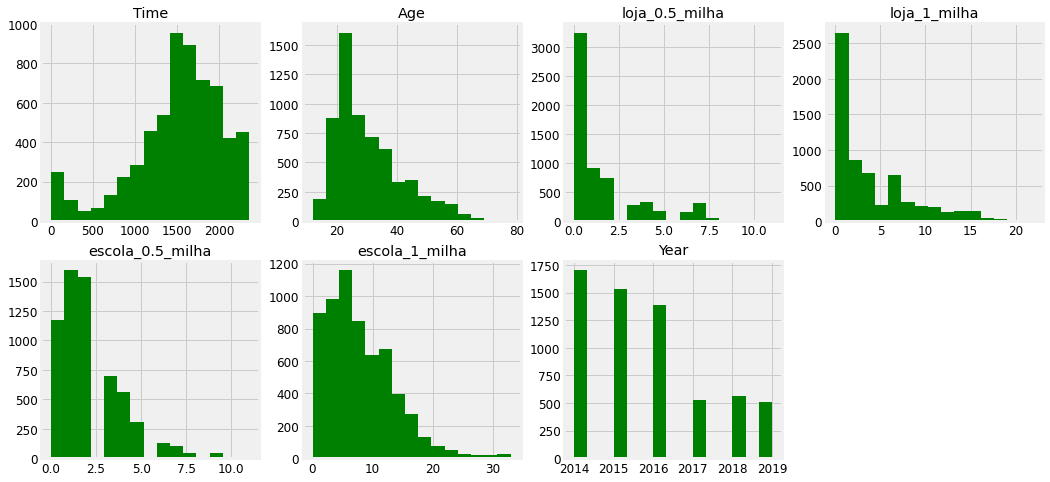

In [201]:
# Histogramas

# Figura
fig = plt.figure(figsize = (16,8))

# Loop pelas variáveis e plot do histograma
for i, col in enumerate(df_prisoes_var): 
    fig.add_subplot(2,4,1+i) 
    col_data = df_prisoes[col] 
    plt.hist(col_data, bins = 15, color = 'green')
    plt.title(col)

Parece que nenhuma variável segue uma distribuição normal. Checamos isso daqui a pouco. Vamos conferir o dataframe de escolas.

In [202]:
df_escolas.head()

,School,Zip Code,Grades,Local District,Board District,complete_address,latitude,longitude,prisao_0.5_milha,prisao_1_milha
0,Frank Del Olmo Elementary,90004,K- 5,C,2-Monica Garcia,100 N New Hampshire Ave Los Angeles CA 90004,34.072925,-118.292591,28,95
1,10th Street Elementary,90015,1- 5,C,2-Monica Garcia,1000 Grattan St Los Angeles CA 90015,34.048284,-118.273264,26,141
2,Elementary Community Day School,91311,K- 6,XS,3-Scott M Schmerelson,10001 Jumilla Ave Chatsworth CA 91311,34.251825,-118.563377,1,3
3,Cesar E Chavez Learning Academy - Arts/Theatre...,91340,9-12,NE,6-Kelly Gonez,1001 Arroyo Ave San Fernando CA 91340,34.288514,-118.421011,1,16
4,San Pedro Senior High Gifted STEAM Magnet,90731,9-12,S,7-Dr Richard A Vladovic,1001 W 15th St San Pedro CA 90731,33.730370,-118.299342,18,74


In [209]:
# Vamos criar o histograma dessas duas variáveis
df_escolas_var = df_escolas[['prisao_0.5_milha', 'prisao_1_milha']]

# Describe
df_escolas_var.describe()

,prisao_0.5_milha,prisao_1_milha
count,914.000000,914.000000
mean,14.219912,53.638950
std,28.074045,68.279071
min,0.000000,0.000000
25%,1.000000,12.000000
50%,7.000000,32.000000
75%,19.000000,73.000000
max,552.000000,677.000000


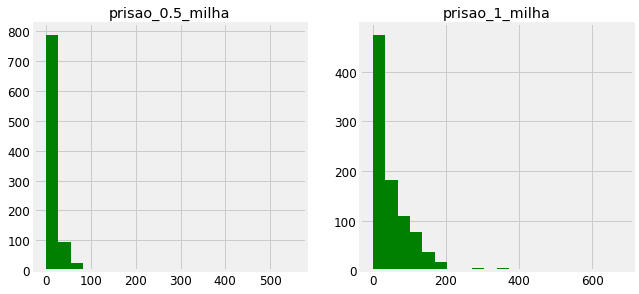

In [210]:
# Histogramas

# Figura
fig = plt.figure(figsize = (20,10))

# Loop pelas variáveis e plot do histograma
for i, col in enumerate(df_escolas_var):  
    fig.add_subplot(2, 4, 1 + i)
    col_data = df_escolas[col] 
    plt.hist(col_data, bins = 20, color = 'green')
    plt.title(col)

Parece que nenhuma variável segue uma distribuição normal. Vamos checar então.

### Teste de Normalidade das Variáveis

Muitos algoritmos de Machine Learning fazem suposições sobre os dados. Em geral, consideramos que essas suposições são verdadeiras, mas devemos tomar cuidado com isso, pois se uma suposição estiver sendo violada estaremos extraindo conclusões equivocadas de todo o processo de Ciência de Dados.

E uma das suposições mais comuns é a de normalidade, ou seja, que a variável segue uma distribuição normal. Isso significa que a distribuição de probabilidades da variável (todos os possíveis valores que a variável pode assumir), tem o formato como da imagem abaixo, a categoria Mesocurtica:

![title](https://explicacoesestatistica.com/?brizy_media=wp-ef00ce426b45a9586fc4ad1636e31b0d&brizy_crop=iW%3D420%26iH%3D120%26oX%3D0%26oY%3D0%26cW%3D420%26cH%3D120)

**Distribuição Normal**

Uma distribuição normal (ou gaussiana) é uma distribuição de probabilidade contínua que possui uma função de densidade de probabilidade em forma de sino. É a distribuição de probabilidade mais proeminente em Estatística.

As distribuições normais são uma família de distribuições com a mesma curva geral simétrica em forma de sino, com mais valores concentrados no meio do que nas caudas. Dois parâmetros descrevem uma distribuição normal, a média e o desvio padrão. A média é a localização central (o pico) e o desvio padrão é a dispersão. A assimetria e curtose são zero para uma distribuição normal.

A distribuição normal é a base de muitas teorias estatísticas. Testes estatísticos e estimadores baseados na distribuição normal costumam ser mais poderosos do que seus equivalentes não paramétricos. Quando a suposição de distribuição pode ser atendida, elas são as melhores opções, pois isso permite usar um tamanho de amostra menor para detectar a mesma diferença.

E podemos usar uma das mais úteis ferramentas da Inferência Estatística para testar essa suposição: o Teste de Hipóteses.

**Teste de Hipóteses**

O teste de hipóteses é o processo formal de fazer inferências a partir de uma amostra, se uma afirmação sobre a população parece ou não verdadeira.

Um teste de hipóteses é um método de tomada de decisões. Você deve declarar uma hipótese nula e uma hipótese alternativa para executar um teste de hipóteses. A hipótese nula afirma o que o estudo pretende rejeitar e refutar. A hipótese alternativa é geralmente a negação da hipótese nula e afirma o que o estudo está tentando provar.

Quando as hipóteses são declaradas, um teste estatístico calcula uma estatística e um valor-p. O valor-p é a probabilidade de obter uma estatística de teste pelo menos tão extrema quanto a observada quando a hipótese nula é verdadeira. É uma medida de evidência contra a hipótese nula. Quando o valor-p é pequeno, é improvável que os dados tenham ocorrido se a hipótese nula for verdadeira, para que você possa rejeitar a hipótese nula e aceitar a hipótese alternativa. Quando o valor-p é grande, você não pode rejeitar a hipótese nula; não há evidências suficientes contra isso. 

Não é possível provar a hipótese nula, apenas refutá-la. O valor-p não permite que você faça afirmações sobre a probabilidade da hipótese nula ser verdadeira; é uma declaração baseada na observação dos dados.

Um Teste de Hipóteses testa formalmente se a população que a amostra representa é normalmente distribuída.

A hipótese nula (H0) afirma que a população é normalmente distribuída, contra a hipótese alternativa (H1) de que não é normalmente distribuída. 

Se o valor-p do teste for menor que o nível de significância predefinido, você poderá rejeitar a hipótese nula e concluir que os dados não são de uma população com uma distribuição normal. Se o valor-p for maior que o nível de significância predefinido, você não poderá rejeitar a hipótese nula.

Observe que pequenos desvios da normalidade podem produzir um valor-p estatisticamente significativo quando o tamanho da amostra é grande e, inversamente, pode ser impossível detectar a não normalidade com uma amostra pequena. Você sempre deve examinar o gráfico normal e usar seu julgamento, em vez de confiar apenas no teste de hipóteses. Muitos testes estatísticos e estimadores são robustos contra partidas moderadas na normalidade devido ao teorema central do limite limite central.

Vamos criar uma função e testar a normalidade das variáveis.

In [211]:
# Função para testar a normalidade das variáveis
def testa_normalidade(dataframe, list_of_cols ,sig_level = 0.05):
    
    # Lista de colunas do dataframe
    total_variables = len(list_of_cols)
    
    # Inicializa o contador de variáveis que forem 'não normais'
    not_normal_variables = 0
    
    # Loop em cada coluna da lista de colunas
    for col in list_of_cols:
        
        # Executa o teste de normalidade para a variável
        p_val = stats.normaltest(dataframe[col])[1]
        
        # Nível de Significância
        sig_lvl = 0.05
        
        # Verifica o valor-p
        if p_val < sig_lvl:
            print(f'{col}')
            print(f'Valor-p: {p_val}\nNível de Significância: {sig_lvl}\n')
            print("Como o Valor-p é menor que o Nível de Significância, rejeitamos a hipótese nula e concluímos que a variável não segue uma distribuição normal.\n")
            not_normal_variables += 1
        elif p_val > sig_lvl:
            print(f'{col}')
            print(f'Valor-p: {p_val}\nNível de Significância: {sig_lvl}\n')
            print("Como o Valor-p é maior que o Nível de Significância, nós falhamos em rejeitar a hipótese nula.\n")
    
    if not_normal_variables/total_variables == 1:
        print('Para cada variável, como o valor-p é menor que o nível de significância, rejeite a hipótese nula e conclua que a variável não segue a distribuição normal.')
    else:
        print(f'{not_normal_variables} varáveis que não seguem uma distribuição normal')


In [212]:
# Executa a função
testa_normalidade(df_prisoes, df_prisoes_var)

Time
Valor-p: 3.7075045947738646e-165
Nível de Significância: 0.05

Como o Valor-p é menor que o Nível de Significância, rejeitamos a hipótese nula e concluímos que a variável não segue uma distribuição normal.

Age
Valor-p: 1.1205894980358965e-190
Nível de Significância: 0.05

Como o Valor-p é menor que o Nível de Significância, rejeitamos a hipótese nula e concluímos que a variável não segue uma distribuição normal.

loja_0.5_milha
Valor-p: 0.0
Nível de Significância: 0.05

Como o Valor-p é menor que o Nível de Significância, rejeitamos a hipótese nula e concluímos que a variável não segue uma distribuição normal.

loja_1_milha
Valor-p: 4.4033558398110414e-263
Nível de Significância: 0.05

Como o Valor-p é menor que o Nível de Significância, rejeitamos a hipótese nula e concluímos que a variável não segue uma distribuição normal.

escola_0.5_milha
Valor-p: 5.0694706410973965e-291
Nível de Significância: 0.05

Como o Valor-p é menor que o Nível de Significância, rejeitamos a hipótese 

In [213]:
# Executa a função
testa_normalidade(df_escolas, df_escolas_var)

prisao_0.5_milha
Valor-p: 0.0
Nível de Significância: 0.05

Como o Valor-p é menor que o Nível de Significância, rejeitamos a hipótese nula e concluímos que a variável não segue uma distribuição normal.

prisao_1_milha
Valor-p: 2.89834664499081e-162
Nível de Significância: 0.05

Como o Valor-p é menor que o Nível de Significância, rejeitamos a hipótese nula e concluímos que a variável não segue uma distribuição normal.

2 varáveis que não seguem uma distribuição normal


**Conclusão**: Nenhuma variável segue uma distribuição normal, o que significa que devemos ser cautelosos ao criar nossos modelos preditivos na Parte 3.

### Conclusão Final

Claramente parece haver um padrão entre o volume de prisões e a legalização da maconha. A proximidade das prisões com pontos de vendas ou com escolas não parece variar de um ano para o outro, o que leva a crer que que pontos de venda ou escolas não estão ligados às prisões. Talvez outro fator explique melhor a redução das prisões. Acho que Machine Learning poderá ajudar nisso. Até a Parte 3.